In [1]:
# Import dependencies
import pandas as pd
import scipy.stats as st
from scipy import optimize
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [15]:
# Prepare the dataset for analysis
# Read in csv file
file_path = "Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv"
inital_df = pd.read_csv(file_path)

# Drop the unwanted columns.
inital_df = inital_df.drop(columns=['Data As Of', 'Start Date', 'End Date', 'ICD10_codes', 'Number of Mentions', 'Flag'])

# Only keep the rows where the Group is "By Month", and delete the row where Age Group is "All Ages"
inital_df = inital_df.loc[inital_df['Group'] == 'By Month']
clean_df = inital_df.loc[inital_df['Age Group'] != 'All Ages']

# Drop the NaN values
clean_df = clean_df.dropna()

# Convert Year and Month columns to integers
clean_df.loc[:, 'Year'] = clean_df['Year'].astype(int)
clean_df.loc[:, 'Month'] = clean_df['Month'].astype(int)
clean_df.loc[:, 'COVID-19 Deaths'] = clean_df['COVID-19 Deaths'].astype(int)

clean_df.head()

,Group,Year,Month,State,Condition Group,Condition,Age Group,COVID-19 Deaths
62100,By Month,2020,1,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62101,By Month,2020,2,United States,Respiratory diseases,Influenza and pneumonia,0-24,0
62102,By Month,2020,3,United States,Respiratory diseases,Influenza and pneumonia,0-24,9
62103,By Month,2020,4,United States,Respiratory diseases,Influenza and pneumonia,0-24,27
62104,By Month,2020,5,United States,Respiratory diseases,Influenza and pneumonia,0-24,19


In [82]:
# Group Covid-19 deaths by year and month while keeping months in order
grouped_df = clean_df.groupby(['Year', 'Month'])['COVID-19 Deaths'].sum().reset_index()
grouped_df.sort_values(by=['Year', 'Month'])


# Group into seasons by defining a function to return the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"
# Apply the function to the dataframe and create a new column named "Season"    
grouped_df['Season'] = grouped_df['Month'].apply(get_season)

grouped_df


,Year,Month,COVID-19 Deaths,Season
0,2020,1,25,Winter
1,2020,2,70,Winter
2,2020,3,43323,Spring
3,2020,4,442362,Spring
4,2020,5,265779,Spring
5,2020,6,124070,Summer
6,2020,7,226907,Summer
7,2020,8,220251,Summer
8,2020,9,135698,Fall
9,2020,10,178474,Fall


In [126]:
covid_seasons = grouped_df.groupby(['Year', 'Season'])['COVID-19 Deaths'].sum().reset_index()

def rename_seasons(season,year):
       season += [''] * (4 - len(season))
       return [f'{s} {year}' for s in season]
       
covid_years = covid_seasons['Year'].unique()
season_year = {}
for year in covid_years:
    seasons = covid_seasons.loc[covid_seasons['Year'] == year, 'Season'].tolist()
    season_year[year] = rename_seasons(seasons,year)

for year in covid_years:
    for i, season in enumerate(['Winter', 'Spring', 'Summer', 'Fall']):
        season_index = i + 1
        if season_index > 0:
            season_index = 3

        covid_seasons.loc[(covid_seasons['Year'] == year) & (covid_seasons['Season'] == season), 'Season'] = season_year[year][i]


print(covid_seasons)

    Year       Season  COVID-19 Deaths
0   2020  Winter 2020           705529
1   2020  Spring 2020           751464
2   2020  Summer 2020           571228
3   2020    Fall 2020           731229
4   2021  Winter 2021          1029730
5   2021  Spring 2021           410485
6   2021  Summer 2021           483637
7   2021    Fall 2021          1506198
8   2022  Winter 2022           214540
9   2022  Spring 2022           209295
10  2022  Summer 2022           261869
11  2022    Fall 2022          1143007
12  2023  Winter 2023            12142
13  2023  Spring 2023           166846


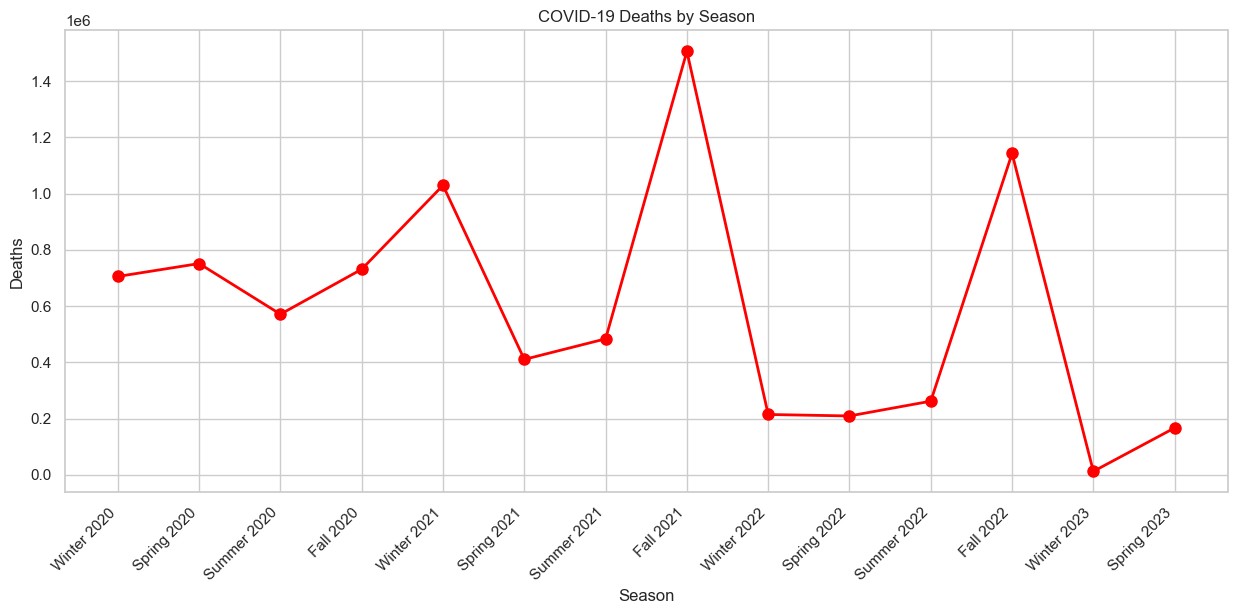

In [36]:

# Plot the data
plt.figure(figsize=(15, 6))
           
plt.plot(covid_seasons['Season'], covid_seasons['COVID-19 Deaths'], color='red', marker='o', linewidth=2, markersize=8)
plt.gca().set_xticks(covid_seasons.index)
plt.gca().set_xticklabels(covid_seasons['Season'], rotation=45, ha='right')

plt.title('COVID-19 Deaths by Season')
plt.xlabel('Season')
plt.ylabel('Deaths')

plt.show()

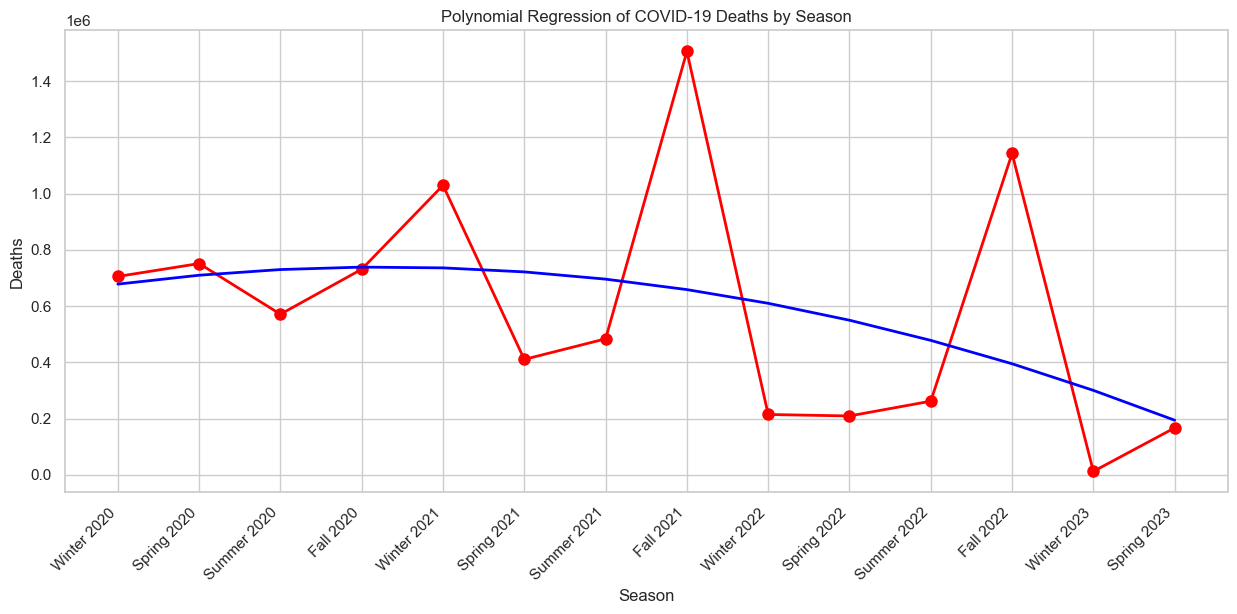

In [39]:
season_dict = {'Winter 2020': 1,
               'Spring 2020': 2,
               'Summer 2020': 3,
               'Fall 2020': 4,
               'Winter 2021': 5,
               'Spring 2021': 6,
               'Summer 2021': 7,
               'Fall 2021': 8,
               'Winter 2022': 9,
               'Spring 2022': 10,
               'Summer 2022': 11,
               'Fall 2022': 12,
               'Winter 2023': 13,
               'Spring 2023': 14,}

season = covid_seasons['Season']
deaths = covid_seasons['COVID-19 Deaths']

season_integer = [season_dict[s] for s in season]

poly = PolynomialFeatures(degree=2)
season_poly = poly.fit_transform(np.array(season_integer).reshape(-1, 1))
model = LinearRegression()
model.fit(season_poly, deaths)

plt.figure(figsize=(15, 6))
plt.plot(covid_seasons.index, deaths, color='red', marker='o',linewidth=2, markersize=8)
plt.plot(covid_seasons.index, model.predict(season_poly), color='blue', linewidth=2)
plt.gca().set_xticks(covid_seasons.index)
plt.gca().set_xticklabels(covid_seasons['Season'], rotation=45, ha='right')
plt.title('Polynomial Regression of COVID-19 Deaths by Season')
plt.xlabel('Season')
plt.ylabel('Deaths')
plt.show()

R-squared: 0.13
p-value: 0.20
std_err: 27286.92


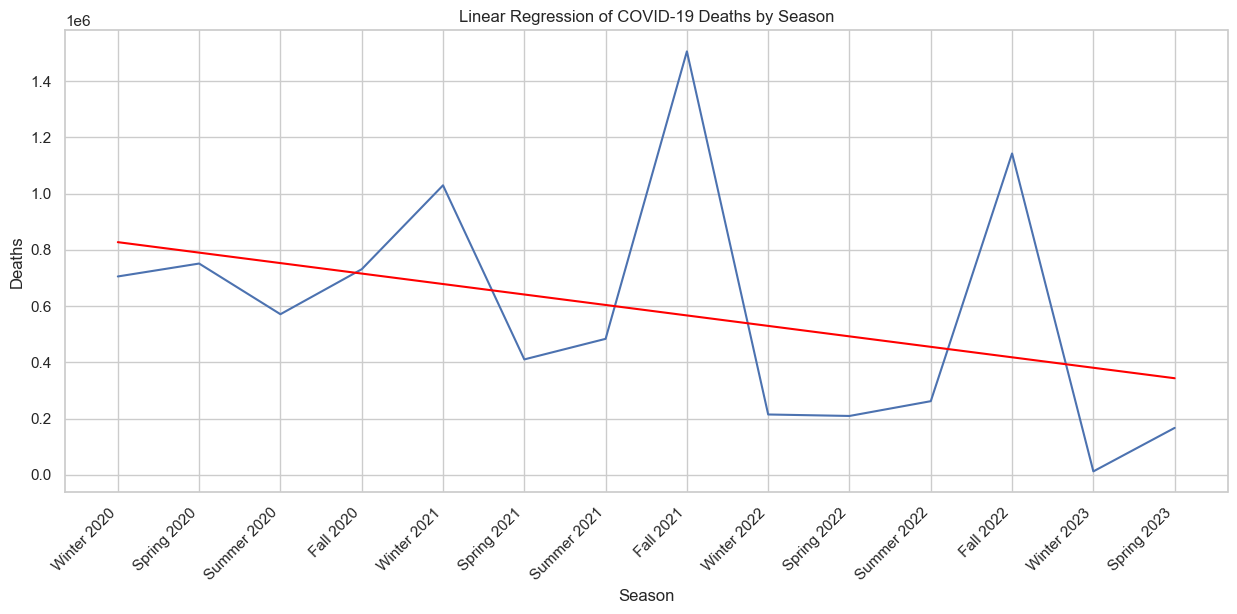

In [40]:


sns.set(style="whitegrid")
plt.subplots(figsize=(15, 6))
sns.lineplot(x="Season", y="COVID-19 Deaths", data=covid_seasons)

slope, intercept, r_value, p_value, std_err = st.linregress(covid_seasons.index, covid_seasons['COVID-19 Deaths'])
expected_values = [slope * i + intercept for i in covid_seasons.index]

sns.lineplot(x='Season', y=expected_values, data=covid_seasons, color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Linear Regression of COVID-19 Deaths by Season')
plt.xlabel('Season')
plt.ylabel('Deaths')


rss = sum((covid_seasons['COVID-19 Deaths'] - expected_values) ** 2)
tss = sum((covid_seasons['COVID-19 Deaths'] - np.mean(covid_seasons['COVID-19 Deaths'])) ** 2)
r_squared = 1 - (rss / tss)

print(f'R-squared: {r_squared:.2f}')
print(f'p-value: {p_value:.2f}')
print(f'std_err: {std_err:.2f}')

plt.show()

In [73]:
# Group Covid-19 deaths by year and month while keeping months in order
grouped_df = clean_df.groupby(['Year', 'Month', 'Condition Group', 'Condition'])['COVID-19 Deaths'].sum().reset_index()
grouped_df.sort_values(by=['Year', 'Month'])


# Group into seasons by defining a function to return the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
# Apply the function to the dataframe and create a new column named "Season"    
grouped_df['Season'] = grouped_df['Month'].apply(get_season)

grouped_df = grouped_df[grouped_df['COVID-19 Deaths'] != 0]

condition_df = grouped_df.groupby(['Year', 'Season', 'Condition'])['COVID-19 Deaths'].sum().reset_index()
condition_group_df = grouped_df.groupby(['Year', 'Season', 'Condition Group'])['COVID-19 Deaths'].sum().reset_index()
condition_group_df

,Year,Season,Condition Group,COVID-19 Deaths
0,2020,Fall,All other conditions and causes (residual),78101
1,2020,Fall,Alzheimer disease,8369
2,2020,Fall,COVID-19,193868
3,2020,Fall,Circulatory diseases,124461
4,2020,Fall,Diabetes,29851
...,...,...,...,...
162,2023,Winter,Obesity,403
163,2023,Winter,Renal failure,4812
164,2023,Winter,Respiratory diseases,37672
165,2023,Winter,Sepsis,4406


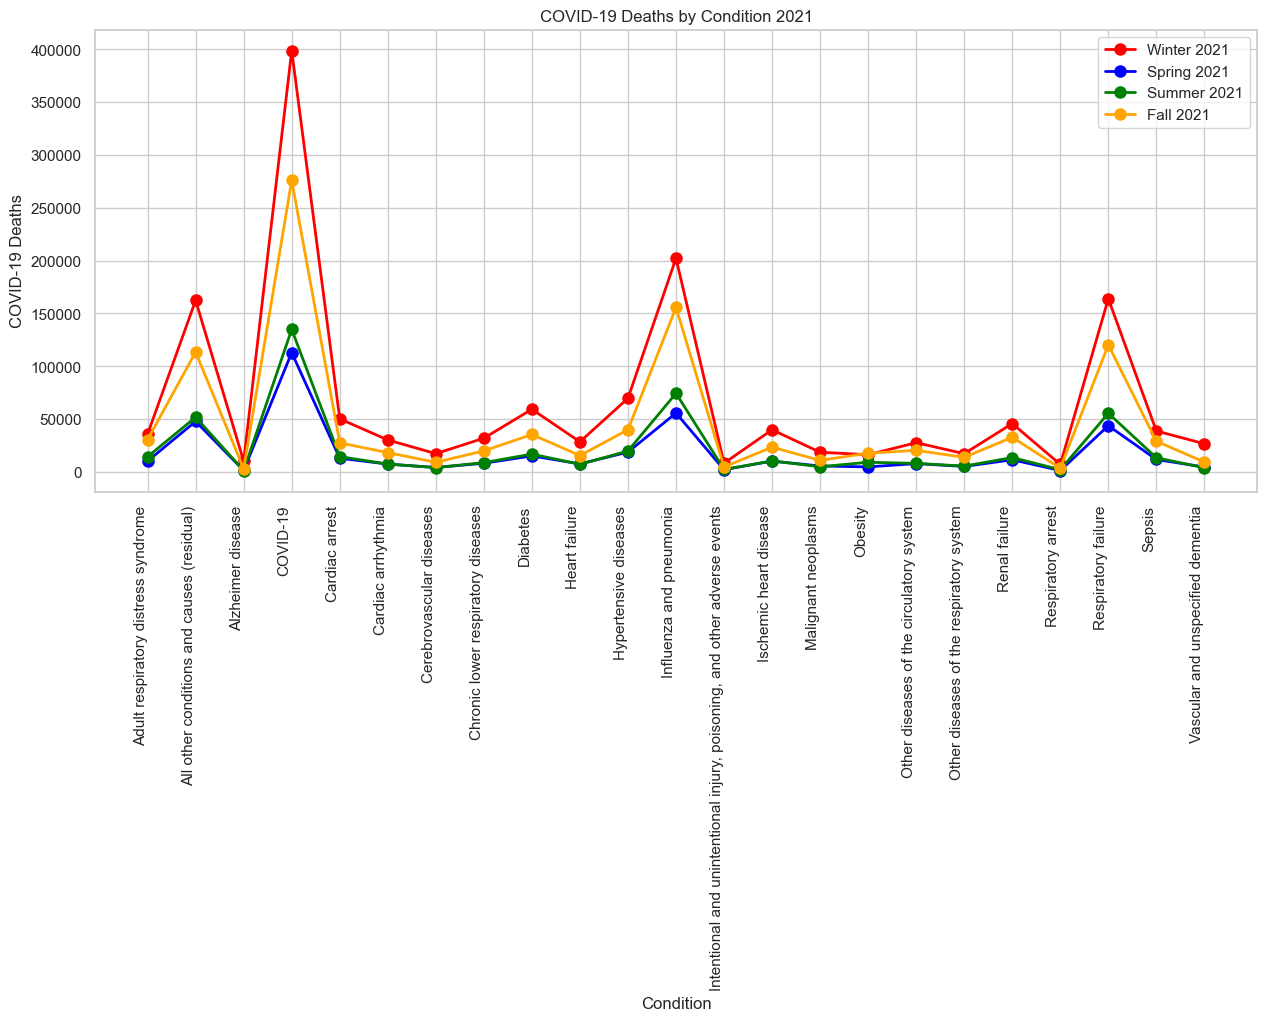

In [74]:
condition2021 = condition_df[condition_df['Year'] == 2021]

x1 = condition2021[condition2021['Season'] == 'Winter']['Condition']
y1 = condition2021[condition2021['Season'] == 'Winter']['COVID-19 Deaths']
x2 = condition2021[condition2021['Season'] == 'Spring']['Condition']
y2 = condition2021[condition2021['Season'] == 'Spring']['COVID-19 Deaths']
x3 = condition2021[condition2021['Season'] == 'Summer']['Condition']
y3 = condition2021[condition2021['Season'] == 'Summer']['COVID-19 Deaths']
x4 = condition2021[condition2021['Season'] == 'Fall']['Condition']
y4 = condition2021[condition2021['Season'] == 'Fall']['COVID-19 Deaths']

plt.figure(figsize=(15, 6))
plt.plot(x1, y1, color='red', marker='o', linewidth=2, markersize=8)
plt.plot(x2, y2, color='blue', marker='o', linewidth=2, markersize=8)
plt.plot(x3, y3, color='green', marker='o', linewidth=2, markersize=8)
plt.plot(x4, y4, color='orange', marker='o', linewidth=2, markersize=8)
plt.xticks(rotation=90, ha='right')
plt.title('COVID-19 Deaths by Condition 2021')
plt.xlabel('Condition')
plt.ylabel('COVID-19 Deaths')
plt.legend(['Winter 2021', 'Spring 2021', 'Summer 2021', 'Fall 2021'])


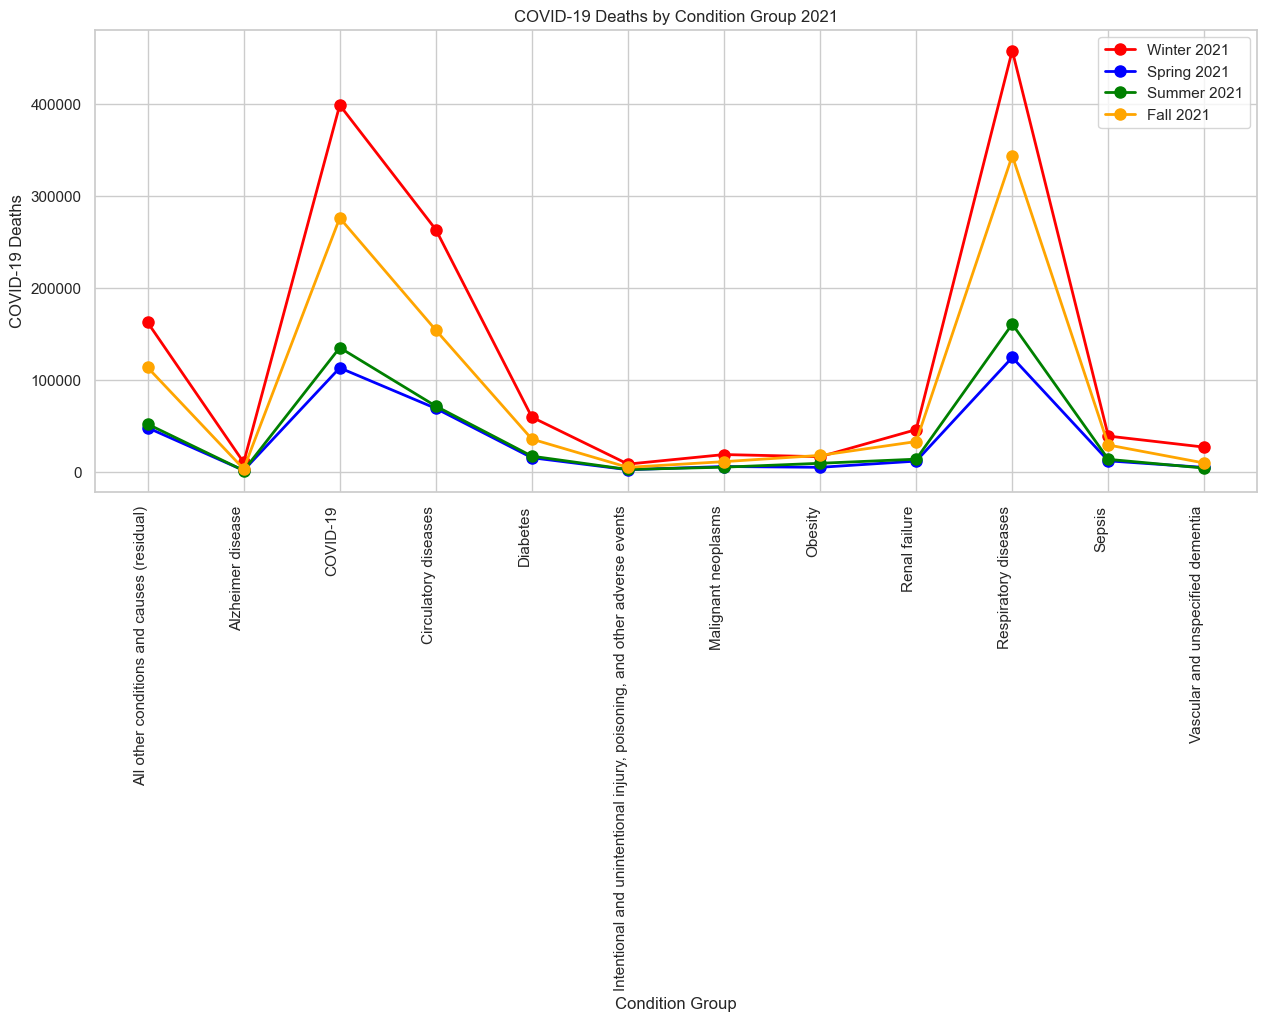

In [75]:
condition_group2021 = condition_group_df[condition_group_df['Year'] == 2021]

x1 = condition_group2021[condition_group2021['Season'] == 'Winter']['Condition Group']
y1 = condition_group2021[condition_group2021['Season'] == 'Winter']['COVID-19 Deaths']
x2 = condition_group2021[condition_group2021['Season'] == 'Spring']['Condition Group']
y2 = condition_group2021[condition_group2021['Season'] == 'Spring']['COVID-19 Deaths']
x3 = condition_group2021[condition_group2021['Season'] == 'Summer']['Condition Group']
y3 = condition_group2021[condition_group2021['Season'] == 'Summer']['COVID-19 Deaths']
x4 = condition_group2021[condition_group2021['Season'] == 'Fall']['Condition Group']
y4 = condition_group2021[condition_group2021['Season'] == 'Fall']['COVID-19 Deaths']

plt.figure(figsize=(15, 6))
plt.plot(x1, y1, color='red', marker='o', linewidth=2, markersize=8)
plt.plot(x2, y2, color='blue', marker='o', linewidth=2, markersize=8)
plt.plot(x3, y3, color='green', marker='o', linewidth=2, markersize=8)
plt.plot(x4, y4, color='orange', marker='o', linewidth=2, markersize=8)
plt.xticks(rotation=90, ha='right')
plt.title('COVID-19 Deaths by Condition Group 2021')
plt.xlabel('Condition Group')
plt.ylabel('COVID-19 Deaths')
plt.legend(['Winter 2021', 'Spring 2021', 'Summer 2021', 'Fall 2021'])

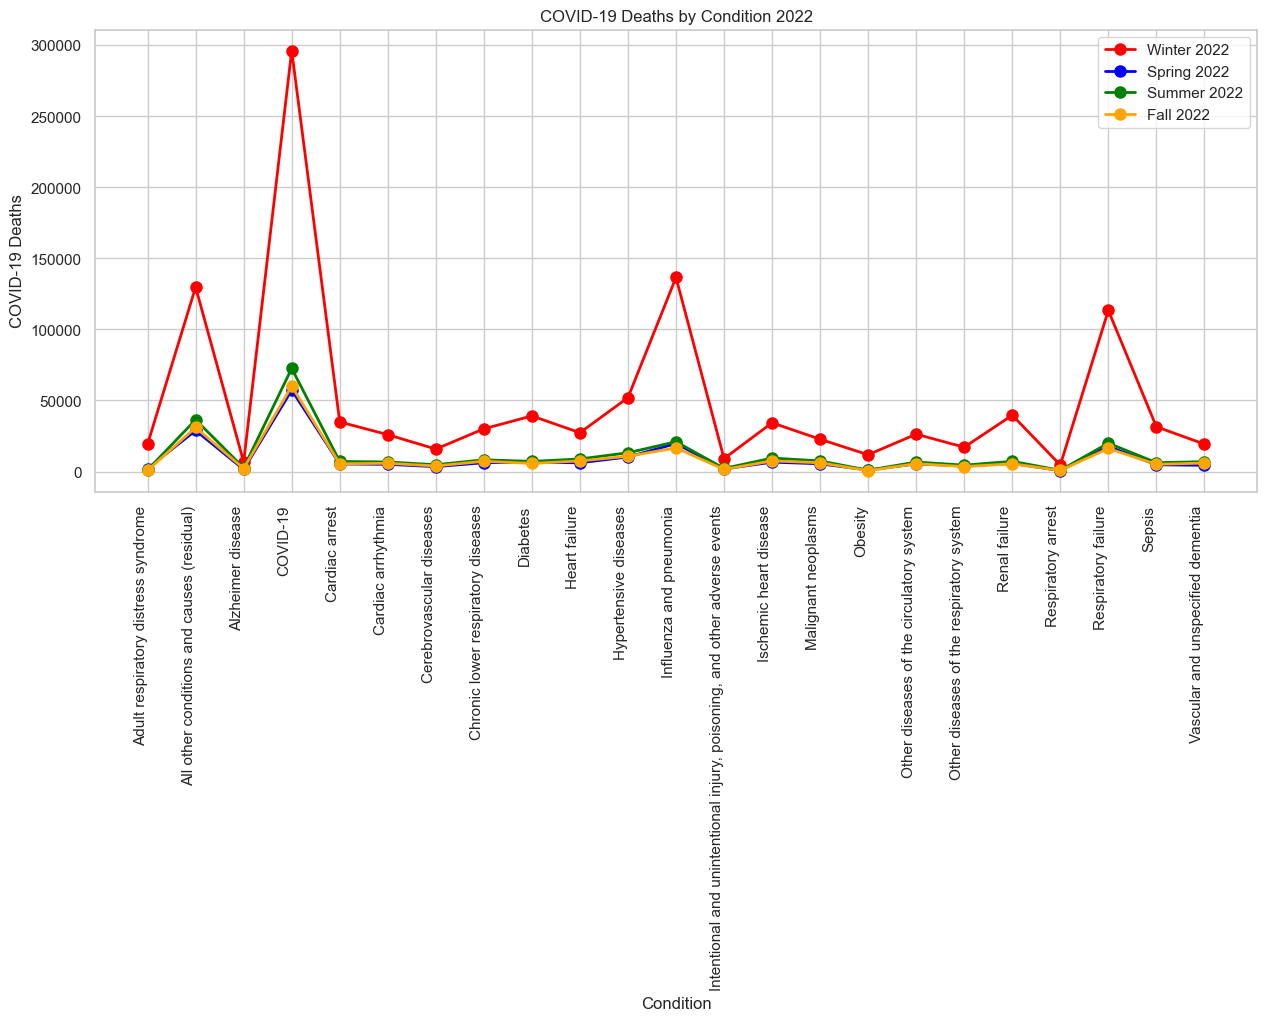

In [76]:
condition2022 = condition_df[condition_df['Year'] == 2022]

x1 = condition2022[condition2022['Season'] == 'Winter']['Condition']
y1 = condition2022[condition2022['Season'] == 'Winter']['COVID-19 Deaths']
x2 = condition2022[condition2022['Season'] == 'Spring']['Condition']
y2 = condition2022[condition2022['Season'] == 'Spring']['COVID-19 Deaths']
x3 = condition2022[condition2022['Season'] == 'Summer']['Condition']
y3 = condition2022[condition2022['Season'] == 'Summer']['COVID-19 Deaths']
x4 = condition2022[condition2022['Season'] == 'Fall']['Condition']
y4 = condition2022[condition2022['Season'] == 'Fall']['COVID-19 Deaths']

plt.figure(figsize=(15, 6))
plt.plot(x1, y1, color='red', marker='o', linewidth=2, markersize=8)
plt.plot(x2, y2, color='blue', marker='o', linewidth=2, markersize=8)
plt.plot(x3, y3, color='green', marker='o', linewidth=2, markersize=8)
plt.plot(x4, y4, color='orange', marker='o', linewidth=2, markersize=8)
plt.xticks(rotation=90, ha='right')
plt.title('COVID-19 Deaths by Condition 2022')
plt.xlabel('Condition')
plt.ylabel('COVID-19 Deaths')
plt.legend(['Winter 2022', 'Spring 2022', 'Summer 2022', 'Fall 2022'])

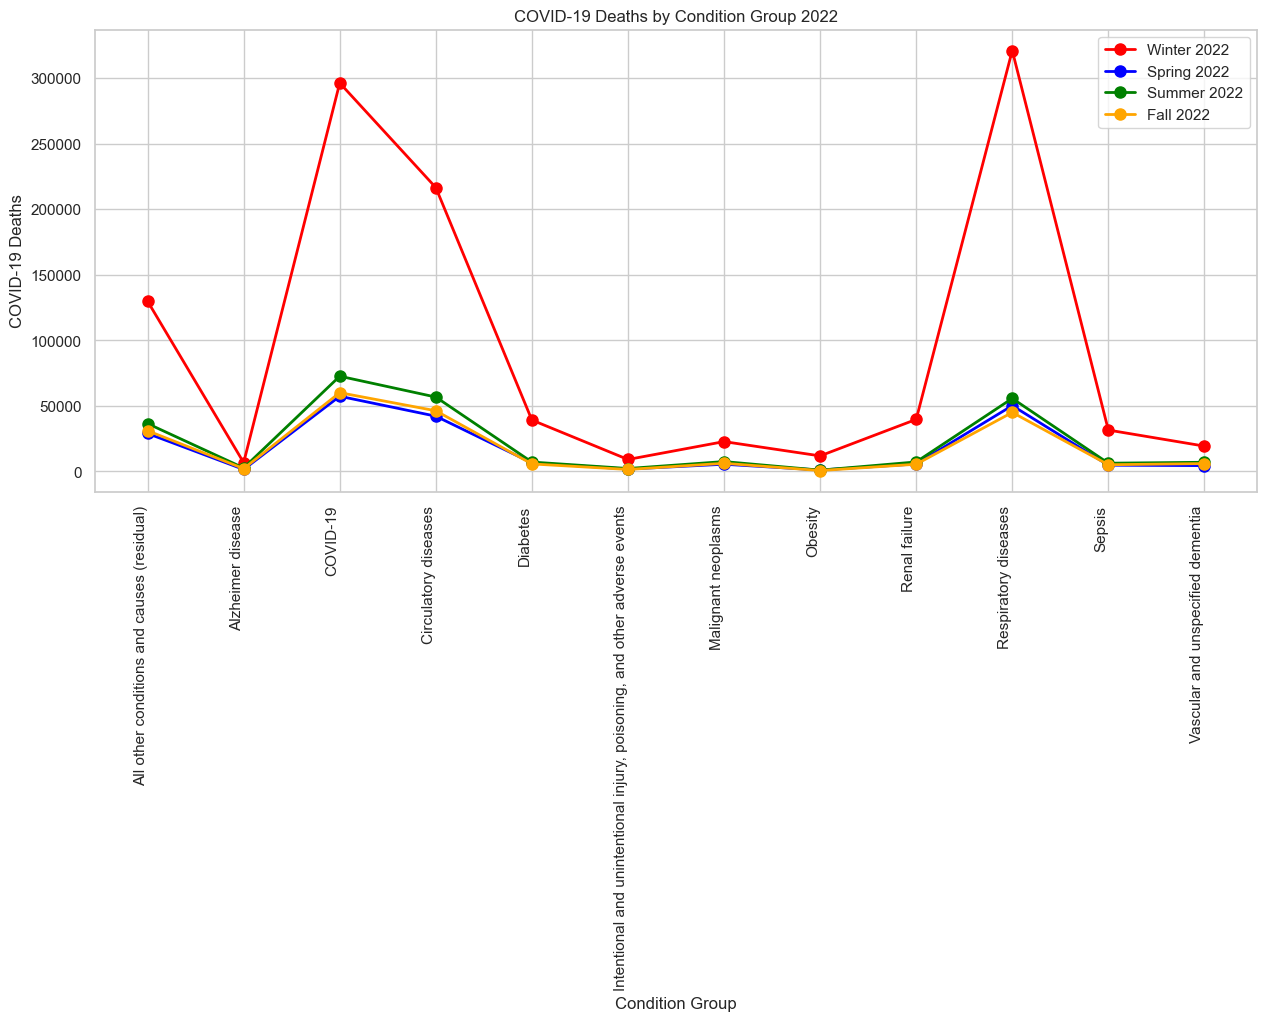

In [84]:
condition_group2022 = condition_group_df[condition_group_df['Year'] == 2022]

x1 = condition_group2022[condition_group2022['Season'] == 'Winter']['Condition Group']
y1 = condition_group2022[condition_group2022['Season'] == 'Winter']['COVID-19 Deaths']
x2 = condition_group2022[condition_group2022['Season'] == 'Spring']['Condition Group']
y2 = condition_group2022[condition_group2022['Season'] == 'Spring']['COVID-19 Deaths']
x3 = condition_group2022[condition_group2022['Season'] == 'Summer']['Condition Group']
y3 = condition_group2022[condition_group2022['Season'] == 'Summer']['COVID-19 Deaths']
x4 = condition_group2022[condition_group2022['Season'] == 'Fall']['Condition Group']
y4 = condition_group2022[condition_group2022['Season'] == 'Fall']['COVID-19 Deaths']

plt.figure(figsize=(15, 6))
plt.plot(x1, y1, color='red', marker='o', linewidth=2, markersize=8)
plt.plot(x2, y2, color='blue', marker='o', linewidth=2, markersize=8)
plt.plot(x3, y3, color='green', marker='o', linewidth=2, markersize=8)
plt.plot(x4, y4, color='orange', marker='o', linewidth=2, markersize=8)
plt.xticks(rotation=90, ha='right')
plt.title('COVID-19 Deaths by Condition Group 2022')
plt.xlabel('Condition Group')
plt.ylabel('COVID-19 Deaths')
plt.legend(['Winter 2022', 'Spring 2022', 'Summer 2022', 'Fall 2022'])